## 1. Import necessery modules

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor

## 2. Import datasets

In [184]:
path_to_data = '../walmart-recruiting-store-sales-forecasting'
data = pd.read_csv(path.join(path_to_data,'train.csv'))
stores = pd.read_csv(path.join(path_to_data,'stores.csv'))
features = pd.read_csv(path.join(path_to_data,'features.csv'))

### 2.1. Preview Datasets

#### 2.1.1 Training Datasets

In [185]:
data.shape

(421570, 5)

In [186]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


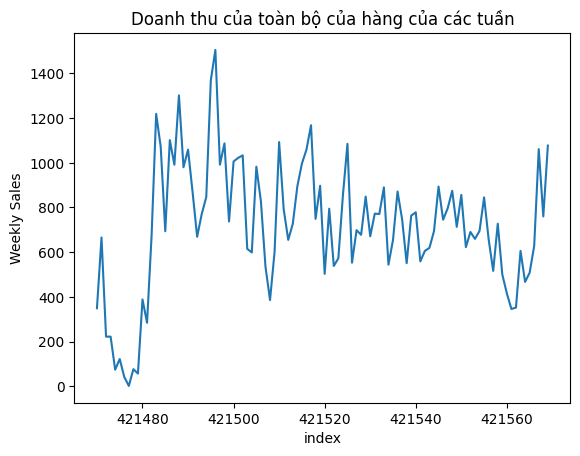

In [188]:
plt.plot(data['Weekly_Sales'].tail(100), linestyle = '-')
plt.ylabel('Weekly Sales')
plt.xlabel('index')
plt.title('Doanh thu của toàn bộ của hàng của các tuần')
plt.show()

#### 2.1.2. Dataset containing store infor

In [189]:
stores.shape

(45, 3)

In [190]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [191]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


#### 2.1.3. Dataset containing additional data infor of stores

In [192]:
features.shape

(8190, 12)

In [193]:
features.tail(100)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8090,45,2011-09-02,70.63,3.703,NaN,NaN,NaN,NaN,NaN,186.618927,8.625,False
8091,45,2011-09-09,71.48,3.738,NaN,NaN,NaN,NaN,NaN,186.673738,8.625,True
8092,45,2011-09-16,69.17,3.742,NaN,NaN,NaN,NaN,NaN,186.802400,8.625,False
8093,45,2011-09-23,63.75,3.711,NaN,NaN,NaN,NaN,NaN,187.029532,8.625,False
8094,45,2011-09-30,70.66,3.645,NaN,NaN,NaN,NaN,NaN,187.256664,8.625,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [194]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## 3. Handling missing values of features dataset

### 3.1. For features CPI

In [195]:
print(features['CPI'].median())

182.7640032


In [196]:
features["CPI"] = features["CPI"].fillna(features["CPI"].median())

In [197]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,NaN,False


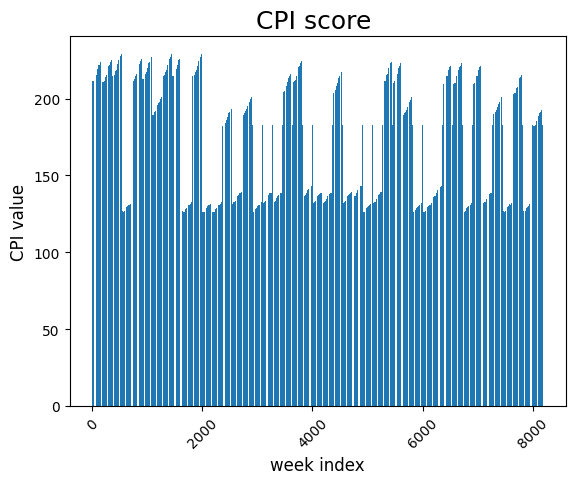

In [198]:
plt.bar(features.index.values,
        features['CPI'])
plt.xlabel('week index',fontsize=12)
plt.ylabel('CPI value',fontsize=12)
plt.xticks(rotation=45)
plt.title('CPI score ', fontsize=18)
plt.show()

### 3.2. For features Unemployment

In [199]:
print(features['Unemployment'].median())

7.806


In [200]:
features["Unemployment"]= features["Unemployment"].fillna(
    features["Unemployment"].median()
)


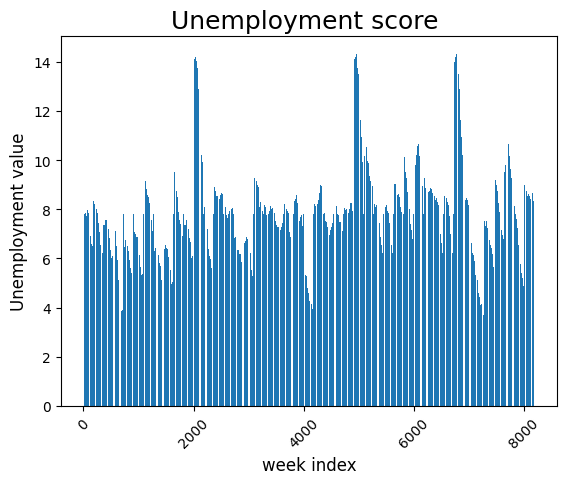

In [201]:
plt.bar(features.index.values,
        features['Unemployment'])
plt.xlabel('week index',fontsize=12)
plt.ylabel('Unemployment value',fontsize=12)
plt.xticks(rotation=45)
plt.title('Unemployment score ', fontsize=18)
plt.show()

### 3.3. For features MarkDown

In [202]:
for i in range(1,6):
    features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
    features["MarkDown"+str(i)] = features["MarkDown"+str(i)].fillna(value=0)

In [203]:

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### 3.4. Merging Training Dataset and merged stores-features Dataset

In [204]:
data_1 = pd.merge(data,stores,on='Store',how='left')

In [205]:
data_2 = pd.merge(data_1,features,on=['Store','Date'],how='left')

In [206]:
data_2['Date'] = pd.to_datetime(data_2['Date'])

In [207]:
data_2.sort_values(by=['Date'],inplace=True)

In [208]:
data_2.set_index(data_2.Date, inplace=True)

In [209]:
data_2

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
2012-10-26,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
2012-10-26,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


In [210]:
data_2['IsHoliday_x'].isin(data_2['IsHoliday_y']).all()

True

In [211]:
data_2.drop(columns='IsHoliday_x',inplace=True)
data_2.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [212]:
data_2.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


### 3.5. Splitting Date Column

In [213]:
data_2['Year']=data_2['Date'].dt.year 
data_2['Month']=data_2['Date'].dt.month
data_2['Week']=data_2['Date'].dt.isocalendar().week

In [214]:
data_2.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


### 3.6 Outlier Detection and Abnormalities

#### 3.6.1 Outlier

In [215]:

agg_data = data_2.groupby(
    ['Store', 'Dept']
).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std'])

In [216]:
agg_data

max       min          mean     median           std
Store Dept                                                           
1     1     57592.12  14537.37  22513.322937  18535.480   9854.349032
      2     65615.36  35819.83  46102.090420  45561.850   3440.673222
      3     51159.17   6165.73  13150.478042  10366.850   8708.978853
      4     47893.23  32497.43  36964.154476  36579.960   2930.698313
      5     85676.09  11570.27  24257.941119  21183.420  11330.286495
...              ...       ...           ...        ...           ...
45    94     7639.88      0.98   3690.272090   4120.155   1852.287364
      95    75204.77  41131.42  52896.166643  52417.470   5117.961708
      96        3.00      2.94      2.970000      2.970      0.042426
      97     8765.09   4935.60   6466.961888   6470.520    659.739542
      98     1504.71      2.00    561.239037    619.410    371.286705

[3331 rows x 5 columns]

In [217]:
agg_data = agg_data.reset_index()
agg_data 

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.480,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.850,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.850,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.960,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.420,11330.286495
...,...,...,...,...,...,...,...
3326,45,94,7639.88,0.98,3690.272090,4120.155,1852.287364
3327,45,95,75204.77,41131.42,52896.166643,52417.470,5117.961708
3328,45,96,3.00,2.94,2.970000,2.970,0.042426
3329,45,97,8765.09,4935.60,6466.961888,6470.520,659.739542


In [218]:
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [219]:
store_data = pd.merge(left=data_2,
                      right=agg_data,
                      on=['Store','Dept'],
                      how='left')
store_data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710
3,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323
4,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,28478.15,16859.93,20680.465944,20490.17,1618.396782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,...,4.145,False,2012,10,43,32611.47,10340.81,20070.128951,19759.05,4609.595932
421566,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,7748.41,2427.98,4690.908322,4682.44,1200.403367
421567,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,9570.37,1790.78,3067.292937,2568.37,1450.166629
421568,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,15008.92,2925.97,6206.423007,5674.61,2264.142811


In [220]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  IsHoliday     421

In [221]:
store_data.dropna(inplace=True)
store_data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710
3,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323
4,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,28478.15,16859.93,20680.465944,20490.17,1618.396782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,...,4.145,False,2012,10,43,32611.47,10340.81,20070.128951,19759.05,4609.595932
421566,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,7748.41,2427.98,4690.908322,4682.44,1200.403367
421567,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,9570.37,1790.78,3067.292937,2568.37,1450.166629
421568,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,15008.92,2925.97,6206.423007,5674.61,2264.142811


In [222]:
data_3 = store_data.copy()
del store_data

In [223]:
data_3['Date']

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, Length: 421533, dtype: datetime64[ns]

In [224]:
# # 
data_3['Date'] = pd.to_datetime(data['Date'])
data_3.sort_values(by=['Date'],inplace=True)
data_3.set_index(data_3.Date, inplace=True)
data_3.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,37,83,2010-02-05,1536.58,C,39910,63.50,3.297,8.62,56.53,...,7.716,False,2011,11,45,3210.66,1451.23,2329.613846,2291.99,346.943074
2010-02-05,44,1,2010-02-05,5471.77,C,39910,33.80,3.513,48.84,224.31,...,6.078,False,2011,11,45,18156.41,3655.40,8049.992308,7576.15,2152.942298
2010-02-05,27,44,2010-02-05,4310.85,A,204184,49.69,3.719,10710.56,44021.61,...,7.906,False,2011,11,45,11557.75,2930.73,4936.005804,4595.58,1394.783845
2010-02-05,4,44,2010-02-05,5873.40,A,205863,47.12,3.286,12851.52,16658.47,...,5.143,False,2011,11,45,11616.12,3463.58,5441.563566,5144.73,1270.035331


In [225]:
data_3['Total_MarkDown'] = data_3['MarkDown1'] + data_3['MarkDown2'] + data_3['MarkDown3'] + data_3['MarkDown4'] + data_3['MarkDown5']
data_3.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)
data_3

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,37,83,2010-02-05,1536.58,C,39910,63.50,3.297,216.721737,7.716,False,2011,11,45,3210.66,1451.23,2329.613846,2291.99,346.943074,979.35
2010-02-05,44,1,2010-02-05,5471.77,C,39910,33.80,3.513,129.816710,6.078,False,2011,11,45,18156.41,3655.40,8049.992308,7576.15,2152.942298,1055.91
2010-02-05,27,44,2010-02-05,4310.85,A,204184,49.69,3.719,140.411161,7.906,False,2011,11,45,11557.75,2930.73,4936.005804,4595.58,1394.783845,64363.19
2010-02-05,4,44,2010-02-05,5873.40,A,205863,47.12,3.286,129.816710,5.143,False,2011,11,45,11616.12,3463.58,5441.563566,5144.73,1270.035331,44783.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,16,41,2012-10-26,2917.10,B,57197,31.77,3.232,192.011600,6.614,False,2011,3,9,4205.28,145.86,1542.986923,1340.68,835.056898,0.00
2012-10-26,41,28,2012-10-26,303.16,A,196321,54.90,2.674,189.418526,7.363,False,2010,6,24,1253.03,164.98,463.271329,429.32,189.699074,0.00
2012-10-26,22,25,2012-10-26,8429.63,B,119557,73.21,2.796,136.524918,8.433,False,2010,8,33,17295.55,5196.03,9725.432727,9624.15,2014.643167,0.00


In [226]:
numeric_col = ['Weekly_Sales',
               'Size',
               'Temperature',
               'Fuel_Price',
               'CPI',
               'Unemployment',
               'Total_MarkDown']

In [227]:
data_numeric = data_3[numeric_col].copy()

In [228]:
data_numeric

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
Date,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0.00
2010-02-05,1536.58,39910,63.50,3.297,216.721737,7.716,979.35
2010-02-05,5471.77,39910,33.80,3.513,129.816710,6.078,1055.91
2010-02-05,4310.85,204184,49.69,3.719,140.411161,7.906,64363.19
2010-02-05,5873.40,205863,47.12,3.286,129.816710,5.143,44783.52
...,...,...,...,...,...,...,...
2012-10-26,2917.10,57197,31.77,3.232,192.011600,6.614,0.00
2012-10-26,303.16,196321,54.90,2.674,189.418526,7.363,0.00
2012-10-26,8429.63,119557,73.21,2.796,136.524918,8.433,0.00


In [229]:
data_4 = data_3[(np.abs(stats.zscore(data_numeric))<2.5).all(axis=1)]
data_4

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,37,83,2010-02-05,1536.58,C,39910,63.50,3.297,216.721737,7.716,False,2011,11,45,3210.66,1451.23,2329.613846,2291.99,346.943074,979.35
2010-02-05,44,1,2010-02-05,5471.77,C,39910,33.80,3.513,129.816710,6.078,False,2011,11,45,18156.41,3655.40,8049.992308,7576.15,2152.942298,1055.91
2010-02-05,14,44,2010-02-05,6189.64,A,200898,37.13,2.777,182.120157,8.992,False,2010,3,9,12991.80,3444.14,5377.124266,5123.74,1435.328966,0.00
2010-02-05,25,56,2010-02-05,608.32,B,128107,44.81,3.530,210.981020,7.082,False,2011,11,45,23646.08,132.75,4359.542517,2061.92,5269.064437,23264.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,16,41,2012-10-26,2917.10,B,57197,31.77,3.232,192.011600,6.614,False,2011,3,9,4205.28,145.86,1542.986923,1340.68,835.056898,0.00
2012-10-26,41,28,2012-10-26,303.16,A,196321,54.90,2.674,189.418526,7.363,False,2010,6,24,1253.03,164.98,463.271329,429.32,189.699074,0.00
2012-10-26,22,25,2012-10-26,8429.63,B,119557,73.21,2.796,136.524918,8.433,False,2010,8,33,17295.55,5196.03,9725.432727,9624.15,2014.643167,0.00


#### 3.6.2 Negative Weekly Sales

In [230]:
y = data_4["Weekly_Sales"][data_4.Weekly_Sales < 0]
y


Date
2010-02-05   -250.08
2010-02-05     -2.47
2010-02-12    -18.04
2010-02-12   -498.00
2010-02-12     -2.00
               ...  
2012-10-26    -59.00
2012-10-26    -28.92
2012-10-26     -2.50
2012-10-26    -11.48
2012-10-26     -3.00
Name: Weekly_Sales, Length: 1191, dtype: float64

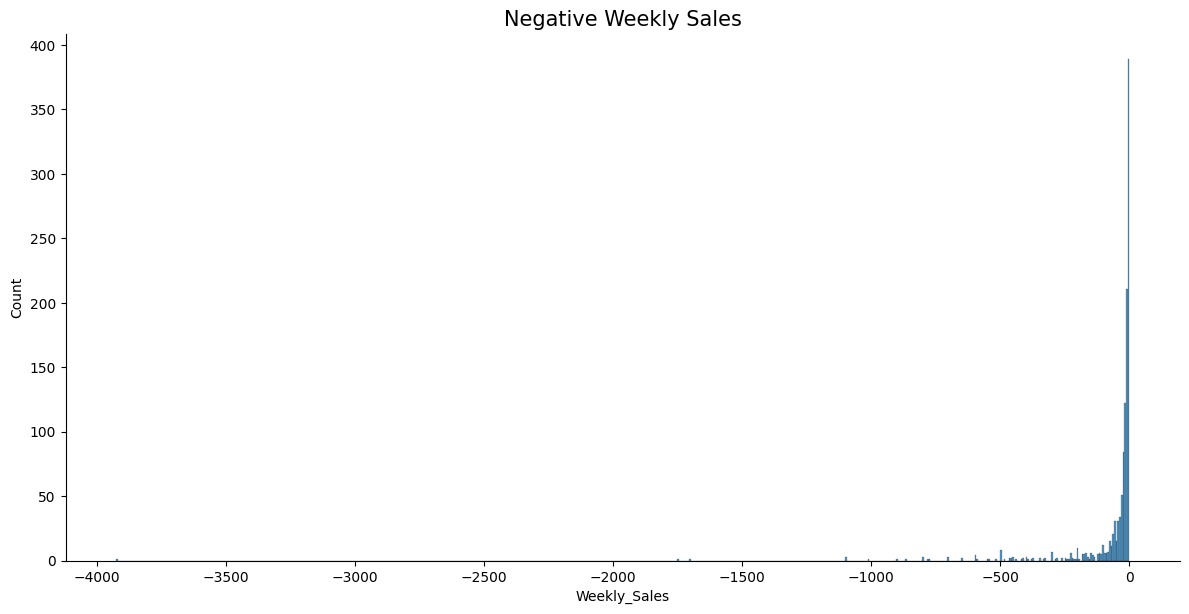

In [231]:
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
# plt.savefig('plots/negative_weekly_sales.png')
plt.show()

In [232]:
data_5 = data_4[data_4['Weekly_Sales']>=0]
data_5

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,37,83,2010-02-05,1536.58,C,39910,63.50,3.297,216.721737,7.716,False,2011,11,45,3210.66,1451.23,2329.613846,2291.99,346.943074,979.35
2010-02-05,44,1,2010-02-05,5471.77,C,39910,33.80,3.513,129.816710,6.078,False,2011,11,45,18156.41,3655.40,8049.992308,7576.15,2152.942298,1055.91
2010-02-05,14,44,2010-02-05,6189.64,A,200898,37.13,2.777,182.120157,8.992,False,2010,3,9,12991.80,3444.14,5377.124266,5123.74,1435.328966,0.00
2010-02-05,25,56,2010-02-05,608.32,B,128107,44.81,3.530,210.981020,7.082,False,2011,11,45,23646.08,132.75,4359.542517,2061.92,5269.064437,23264.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,16,41,2012-10-26,2917.10,B,57197,31.77,3.232,192.011600,6.614,False,2011,3,9,4205.28,145.86,1542.986923,1340.68,835.056898,0.00
2012-10-26,41,28,2012-10-26,303.16,A,196321,54.90,2.674,189.418526,7.363,False,2010,6,24,1253.03,164.98,463.271329,429.32,189.699074,0.00
2012-10-26,22,25,2012-10-26,8429.63,B,119557,73.21,2.796,136.524918,8.433,False,2010,8,33,17295.55,5196.03,9725.432727,9624.15,2014.643167,0.00


In [233]:
data_5.loc[:,('IsHoliday')] = data_5['IsHoliday'].astype('int')
data_5

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\2015797155.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_5.loc[:,('IsHoliday')] = data_5['IsHoliday'].astype('int')


,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.00
2010-02-05,37,83,2010-02-05,1536.58,C,39910,63.50,3.297,216.721737,7.716,0,2011,11,45,3210.66,1451.23,2329.613846,2291.99,346.943074,979.35
2010-02-05,44,1,2010-02-05,5471.77,C,39910,33.80,3.513,129.816710,6.078,0,2011,11,45,18156.41,3655.40,8049.992308,7576.15,2152.942298,1055.91
2010-02-05,14,44,2010-02-05,6189.64,A,200898,37.13,2.777,182.120157,8.992,0,2010,3,9,12991.80,3444.14,5377.124266,5123.74,1435.328966,0.00
2010-02-05,25,56,2010-02-05,608.32,B,128107,44.81,3.530,210.981020,7.082,0,2011,11,45,23646.08,132.75,4359.542517,2061.92,5269.064437,23264.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,16,41,2012-10-26,2917.10,B,57197,31.77,3.232,192.011600,6.614,0,2011,3,9,4205.28,145.86,1542.986923,1340.68,835.056898,0.00
2012-10-26,41,28,2012-10-26,303.16,A,196321,54.90,2.674,189.418526,7.363,0,2010,6,24,1253.03,164.98,463.271329,429.32,189.699074,0.00
2012-10-26,22,25,2012-10-26,8429.63,B,119557,73.21,2.796,136.524918,8.433,0,2010,8,33,17295.55,5196.03,9725.432727,9624.15,2014.643167,0.00


In [234]:
data_5.to_csv('./datasets/preprocessed_walmart_dataset.csv')

### 4. Data Visuallizations

#### 4.1. Average Monthly Sales

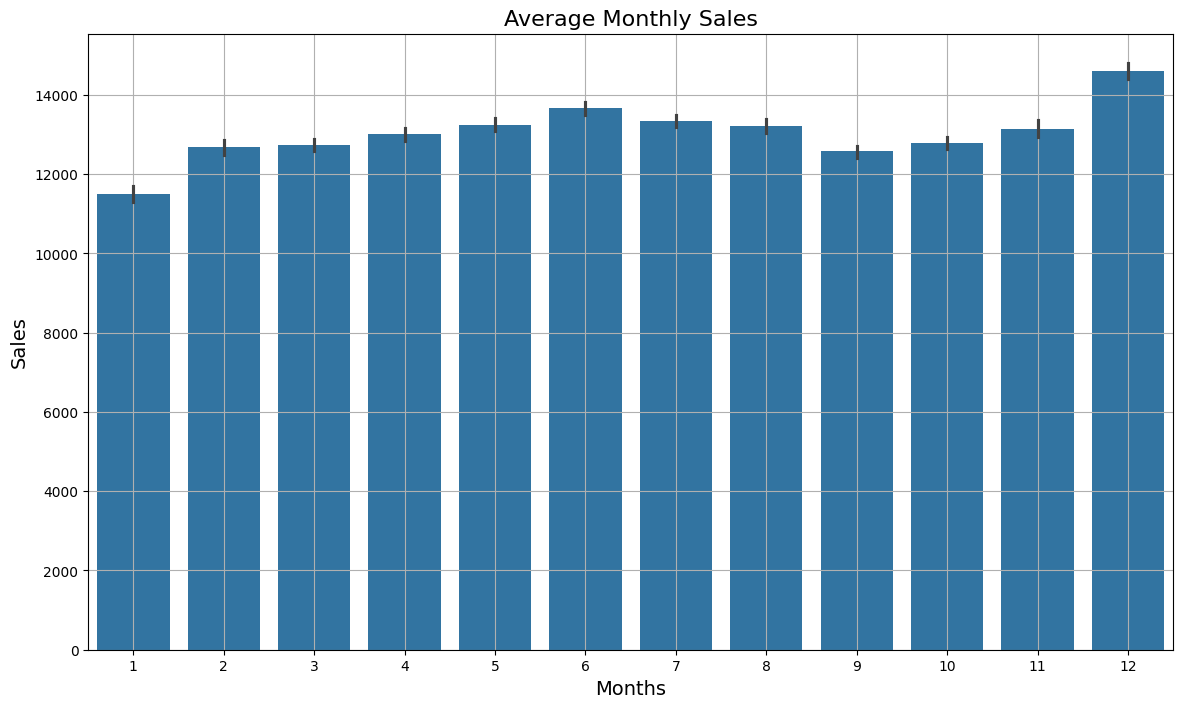

In [235]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data_5)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

#### 4.2 Monthly Sales for Each Year

In [236]:

data_monthly = pd.crosstab(
    data_5["Year"], 
    data_5["Month"], 
    values=data_5["Weekly_Sales"],
    aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


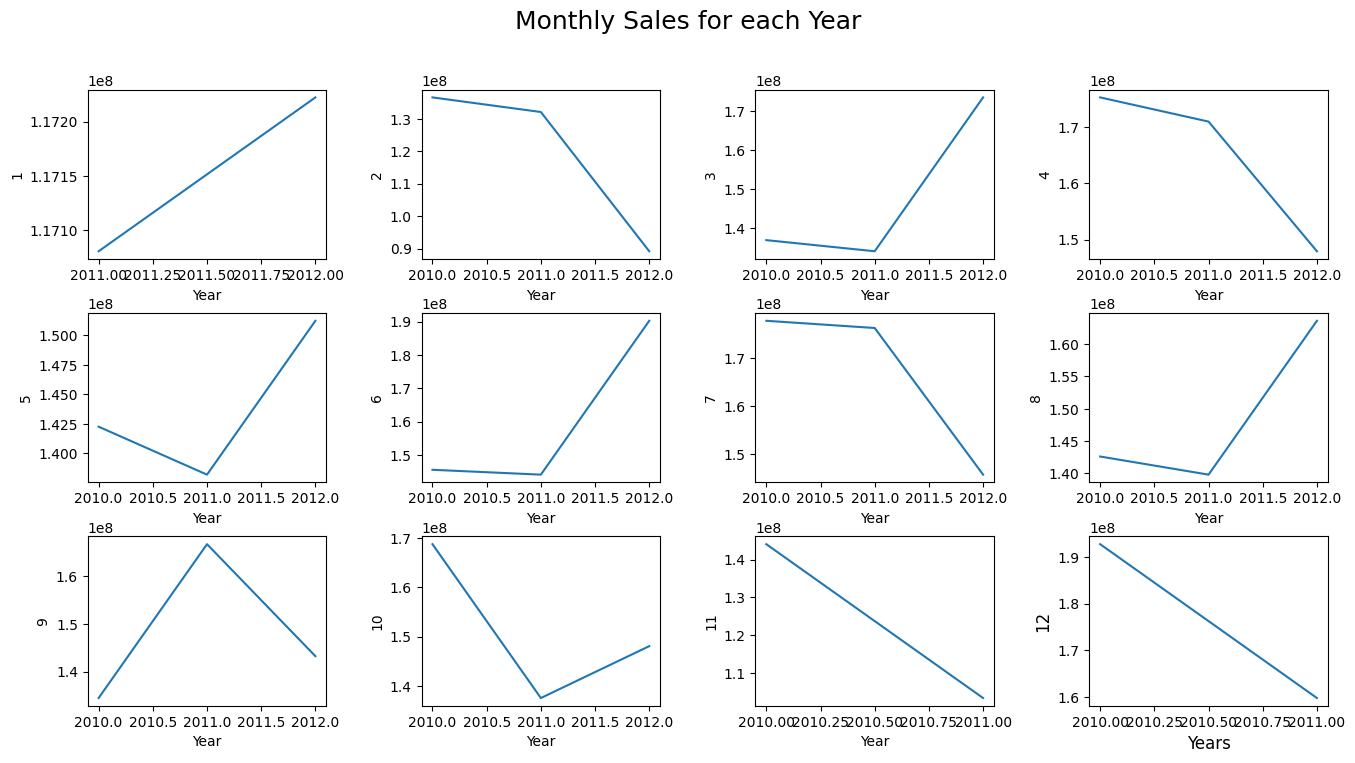

In [237]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
        sns.lineplot(ax=axes[i,j],data=data_monthly[k])
        plt.subplots_adjust(wspace=0.4,hspace=0.32)
        plt.ylabel(k,fontsize=12)
        plt.xlabel('Years',fontsize=12)
        k+=1
plt.show()

#### 4.3 Average Weekly Sales Store wise

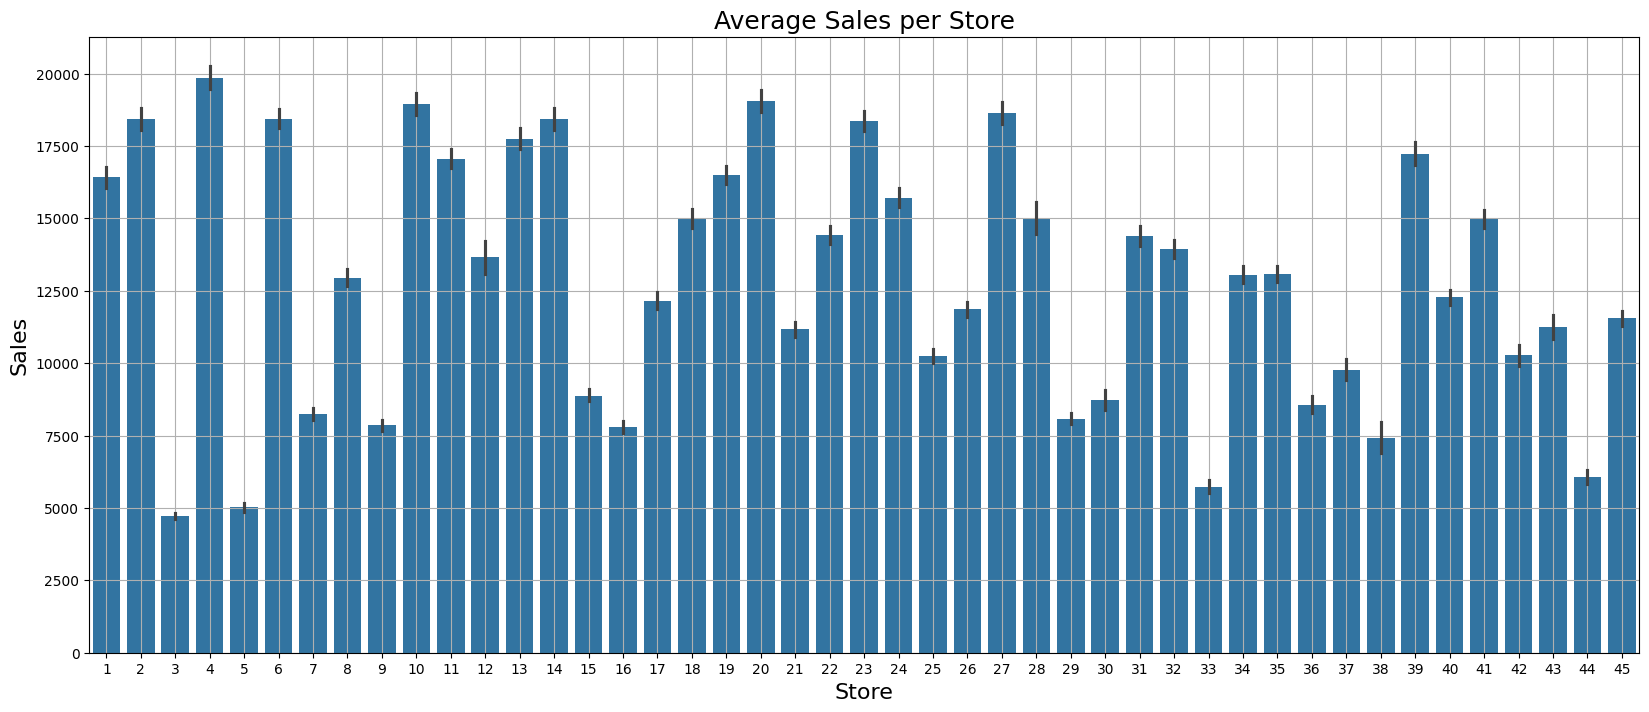

In [238]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data_5)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
# plt.savefig('plots/avg_sales_store.png')
plt.show()

#### 4.4 Average Weekly Sales Department wise

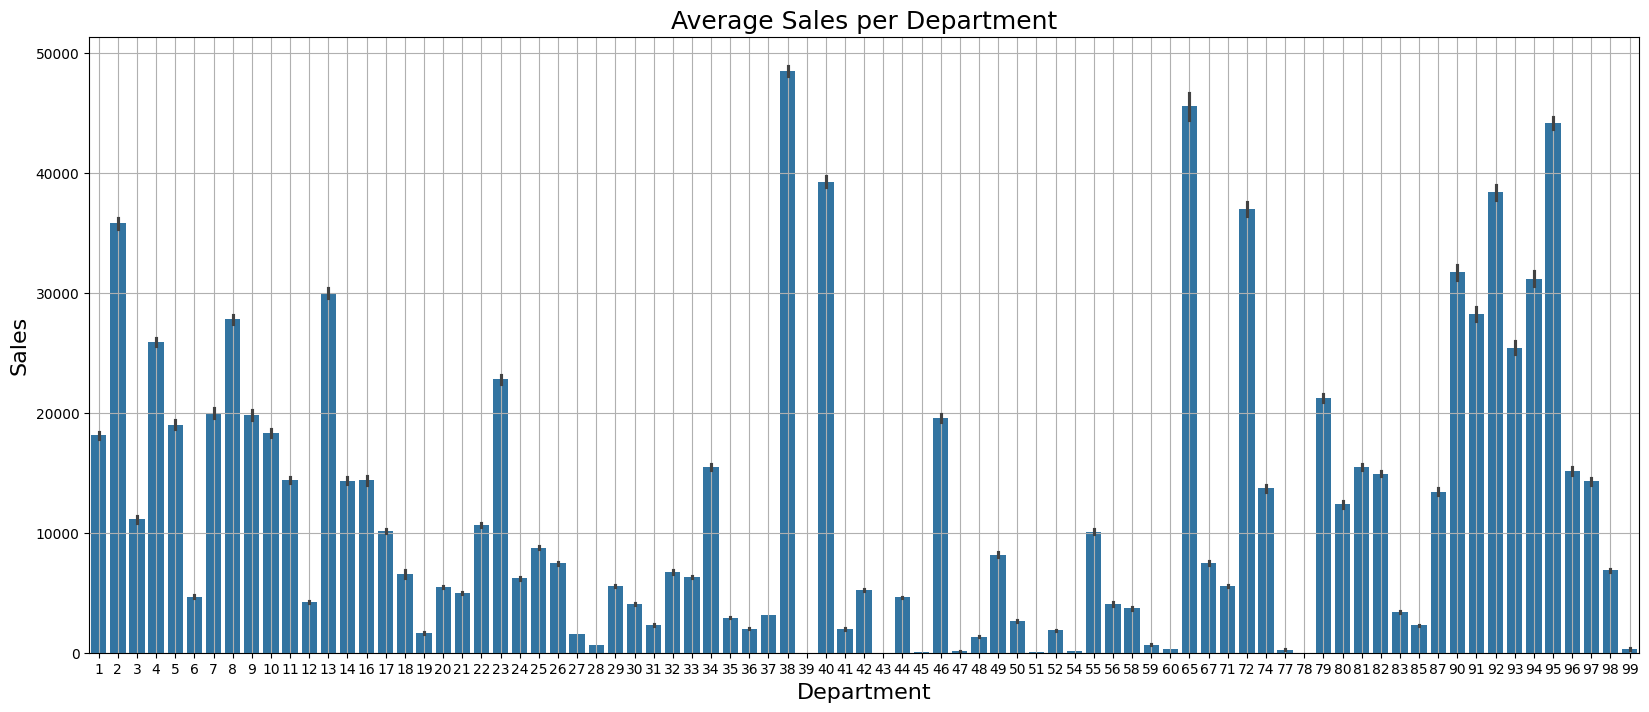

In [239]:

plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data_5)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
# plt.savefig('plots/avg_sales_dept.png')
plt.show()

In [240]:
data_5['Temperature']

Date
2010-02-05    42.31
2010-02-05    63.50
2010-02-05    33.80
2010-02-05    37.13
2010-02-05    44.81
              ...  
2012-10-26    31.77
2012-10-26    54.90
2012-10-26    73.21
2012-10-26    86.30
2012-10-26    58.85
Name: Temperature, Length: 374247, dtype: float64

#### 4.5. Effect of Temperature

C:\Users\USER\AppData\Local\Temp\ipykernel_4064\2748059877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5['Temperature'])


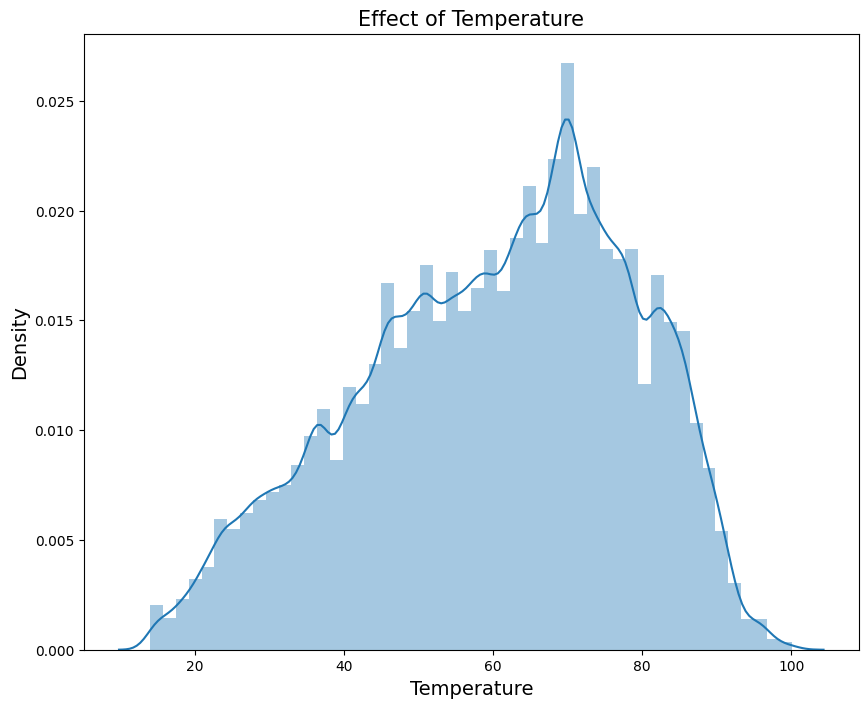

In [241]:

plt.figure(figsize=(10,8))
sns.distplot(data_5['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
# plt.savefig('plots/effect_of_temp.png')
plt.show()

#### 4.6 Holiday Distribution

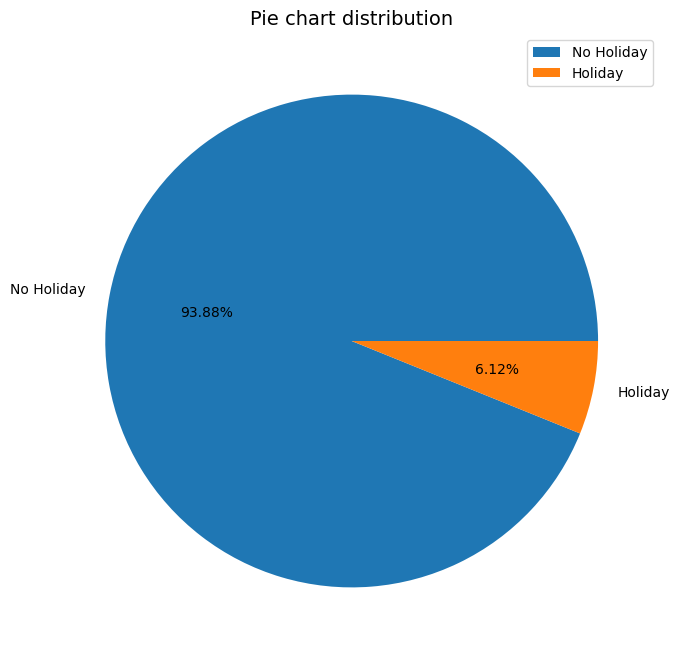

In [242]:
plt.figure(figsize=(8,8))
plt.pie(data_5['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

### 5. Time Series Decompose

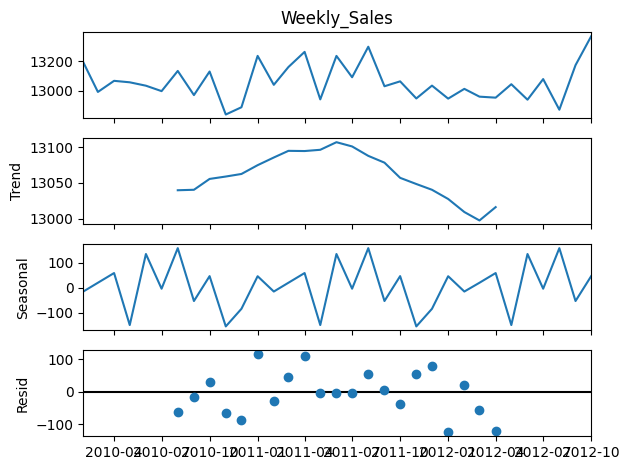

In [243]:

sm.tsa.seasonal_decompose(data_5['Weekly_Sales'].resample('MS').mean(),
                          model='additive').plot()
# plt.savefig('plots/seasonal_decompose.png')
plt.show()

#### One-hot-encoding

In [244]:

cat_col = ['Store','Dept','Type']
data_cat = data_5[cat_col].copy()
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,16,41,B
2012-10-26,41,28,A
2012-10-26,22,25,B
2012-10-26,9,74,B
2012-10-26,45,98,B


In [245]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [246]:
data_5.shape

(374247, 20)

In [247]:
data_6 = pd.concat([data_5,data_cat],axis=1)
data_6.shape

(374247, 149)

In [248]:
data_7=data_6.drop(columns=cat_col)
data_7.shape

(374247, 146)

In [249]:
data_8=data_7.drop(columns=['Date'])
data_8.shape

(374247, 145)

### 6. Data Normalization

In [250]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [251]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [252]:
data_8.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,1536.58,39910,63.50,3.297,216.721737,7.716,0,2011,11,45,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,5471.77,39910,33.80,3.513,129.816710,6.078,0,2011,11,45,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,6189.64,200898,37.13,2.777,182.120157,8.992,0,2010,3,9,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,608.32,128107,44.81,3.530,210.981020,7.082,0,2011,11,45,...,False,False,False,False,False,False,False,False,True,False


In [253]:
data_9 = normalization(data_8.copy(),num_col)
data_9.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.050100,0.840500,0.508787,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.021120,0.027253,0.574547,0.413327,0.896104,0.461844,0,2011,11,45,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,0.075207,0.027253,0.229680,0.521543,0.037094,0.264685,0,2011,11,45,...,False,False,False,False,False,False,False,False,False,True
2010-02-05,0.085074,0.898651,0.268346,0.152806,0.554085,0.615431,0,2010,3,9,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.008361,0.504647,0.357524,0.530060,0.839360,0.385532,0,2011,11,45,...,False,False,False,False,False,False,False,False,True,False


### 7. Correlation between features of dataset

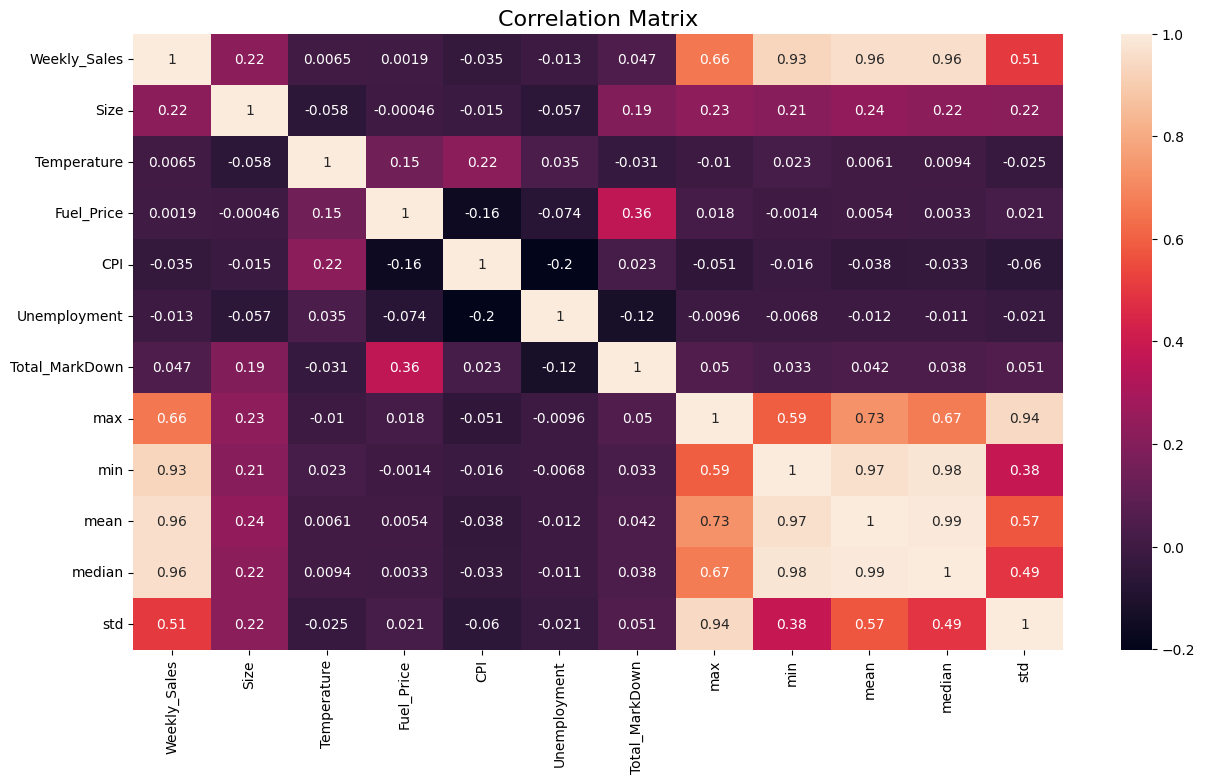

In [254]:

plt.figure(figsize=(15,8))
corr = data_9[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
# plt.savefig('plots/correlation_matrix.png')
plt.show()

### 8. Recursive Feature Elimination

In [255]:
feature_col = data_9.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [256]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data_9[feature_col], data_9['Weekly_Sales'])

E:\anaconda3\envs\btl_data_mining_env\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [257]:
pkl_filename = "./models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
    # saving the trained model to disk 
    with open(pkl_filename, 'wb') as file:
        pickle.dump(radm_clf, file)
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved


In [258]:

indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data_9[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data_9[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean,5.172397e-01
1,2,median,4.107640e-01
2,3,Week,1.959740e-02
3,4,Temperature,8.949684e-03
4,5,CPI,5.887609e-03
...,...,...,...
139,140,Dept_51,2.799033e-10
140,141,Dept_45,1.878220e-10
141,142,Dept_78,8.428139e-12
142,143,Dept_43,3.834785e-14


In [259]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
x

['mean',
 'median',
 'Week',
 'Temperature',
 'CPI',
 'max',
 'Fuel_Price',
 'min',
 'Unemployment',
 'std',
 'Month',
 'Total_MarkDown',
 'Dept_16',
 'Dept_18',
 'IsHoliday',
 'Dept_3',
 'Size',
 'Year',
 'Dept_9',
 'Dept_11',
 'Dept_1',
 'Dept_5',
 'Dept_7']

In [260]:
X = data_9[x]
Y = data_9['Weekly_Sales']

In [261]:
data_10 = pd.concat([X,Y],axis=1)
data_10

,mean,median,Week,Temperature,CPI,max,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Year,Dept_9,Dept_11,Dept_1,Dept_5,Dept_7,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.208157,0.173215,5,0.328495,0.840500,0.088635,0.050100,0.253530,0.508787,0.138276,...,0,False,0.630267,2010,False,False,True,False,False,0.342576
2010-02-05,0.022500,0.022581,45,0.574547,0.896104,0.004941,0.413327,0.083619,0.461844,0.004868,...,0,False,0.027253,2011,False,False,False,False,False,0.021120
2010-02-05,0.075118,0.071584,45,0.229680,0.037094,0.027943,0.521543,0.112238,0.264685,0.030210,...,0,False,0.027253,2011,False,False,True,False,False,0.075207
2010-02-05,0.050532,0.048841,9,0.268346,0.554085,0.019994,0.152806,0.109495,0.615431,0.020140,...,0,False,0.898651,2010,False,False,False,False,False,0.085074
2010-02-05,0.041172,0.020447,45,0.357524,0.839360,0.036391,0.530060,0.066500,0.385532,0.073935,...,0,False,0.504647,2011,False,False,False,False,False,0.008361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.015264,0.013759,9,0.206108,0.651857,0.006472,0.380762,0.066670,0.329201,0.011717,...,0,False,0.120825,2011,False,False,False,False,False,0.040094
2012-10-26,0.005333,0.005307,24,0.474686,0.626226,0.001928,0.101202,0.066919,0.419355,0.002662,...,0,False,0.873876,2010,False,False,False,False,False,0.004167
2012-10-26,0.090529,0.090576,33,0.687297,0.103401,0.026618,0.162325,0.132242,0.548146,0.028269,...,0,False,0.458367,2010,False,False,False,False,False,0.115861


In [262]:
data.to_csv('./datasets/final_data.csv')

### 10. Data Splitted into Training, Validation, Test

In [263]:
X = data_10.drop(['Weekly_Sales'],axis=1)
Y = data_10.Weekly_Sales

In [264]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 Y,
                                                 test_size=0.20, 
                                                 random_state=50)

### 11. Random Forest Regressor Model

In [265]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [273]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.87263043755937


In [274]:
y_pred = rf.predict(X_test)

In [275]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015475229942287309
MSE 0.0009413841250379502
RMSE 0.0306819837207106
R2 0.9787269229779245


In [276]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.023977,0.024970
2010-07-16,0.256635,0.296863
2011-07-08,0.150281,0.156057
2011-12-30,0.405750,0.380896
2011-09-02,0.096641,0.099865
...,...,...
2011-02-04,0.346388,0.348075
2010-08-20,0.004515,0.004849
2010-11-26,0.063935,0.066158


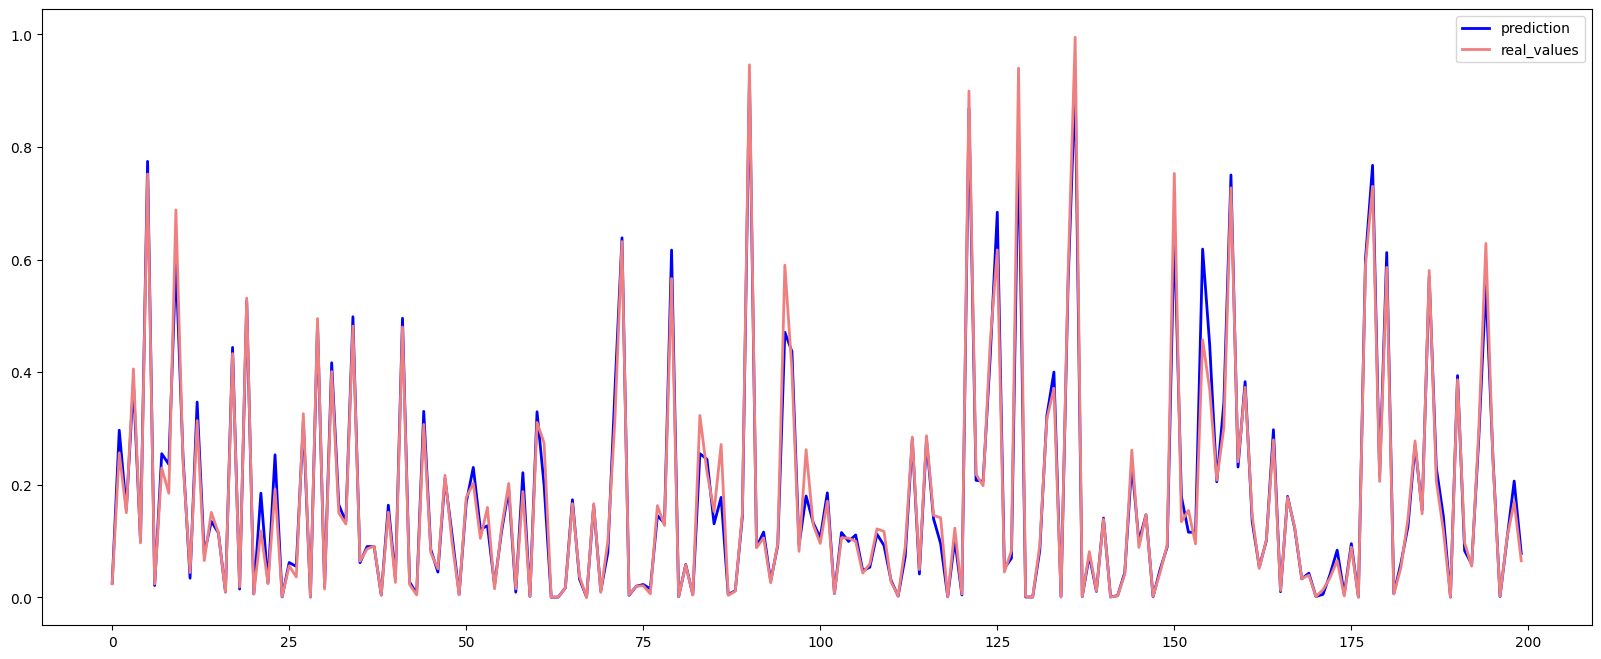

In [277]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), 
         label="prediction", 
         linewidth=2.0,
         color='blue')
plt.plot(y_test[:200].values, 
         label="real_values", 
         linewidth=2.0,
         color='lightcoral')
plt.legend(loc="best")
# plt.savefig('plots/rf_real_pred.png')
plt.show()

In [278]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


### 12. XGboost Model

In [279]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [280]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.2200738220849


In [281]:
y_pred = xgbr.predict(X_test)

In [282]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01987144067663917
MSE 0.0012301475112130342
RMSE 0.035073458785997054
R2 0.9722007406607326


In [283]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.023977,0.030009
2010-07-16,0.256635,0.321047
2011-07-08,0.150281,0.120071
2011-12-30,0.405750,0.465527
2011-09-02,0.096641,0.092184
...,...,...
2011-02-04,0.346388,0.296056
2010-08-20,0.004515,0.003063
2010-11-26,0.063935,0.065600


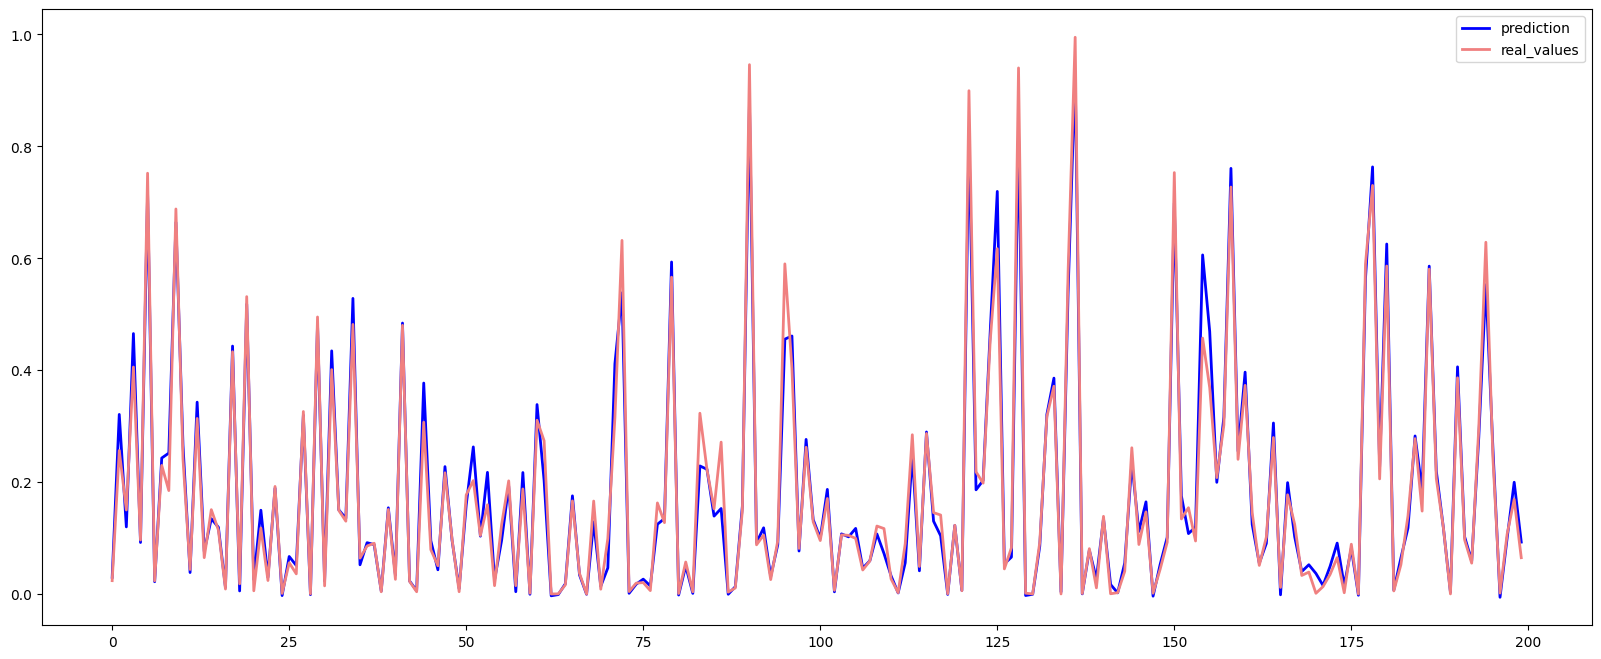

In [284]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), 
         label="prediction", 
         linewidth=2.0,
         color='blue')
plt.plot(y_test[:200].values, 
         label="real_values", 
         linewidth=2.0,
         color='lightcoral')
plt.legend(loc="best")
# plt.savefig('plots/xgb_real_pred.png')
plt.show()

In [285]:

pkl_filename = "./models/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


### 13. Comparing Models

In [286]:
acc = {'model':['rf_acc',
                'xgb_acc'],
       'accuracy':[rf_acc,
                   xgb_acc]
      }

In [287]:

acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,rf_acc,97.872630
1,xgb_acc,97.220074


C:\Users\USER\AppData\Local\Temp\ipykernel_4064\3462567022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model',y='accuracy',data=acc_df, palette='magma')


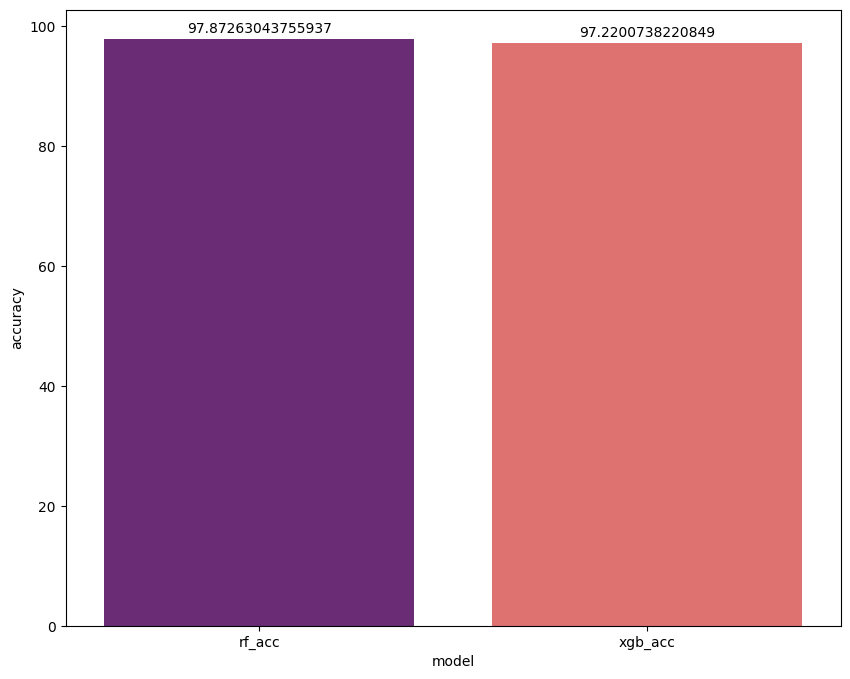

In [293]:
colors = ['blue',  'orange',]
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df, palette='magma')
# Add numbers on top of the bars
for i, value in enumerate(acc_df.accuracy):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()